In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Heart Disease Prediction Tool
The following tool utilizes logistical regression to predict the liklihood of heart disease through 13 features. The data used for the prediction consists of 304 subjects who participated in medical studies.

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
model = linear_model.LogisticRegression(max_iter=10000)
column_names = ['age', 'trtbps', 'chol', 'thalach', 'sex', 'cp', 'fbs', 'restecg', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
y = df.values[:,13]
X = df.values[:,0:13]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



## Dashboard

[Text(0.5, 1.0, 'Cholesterol Levels, Age, and Heart Disease'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Cholesterol')]

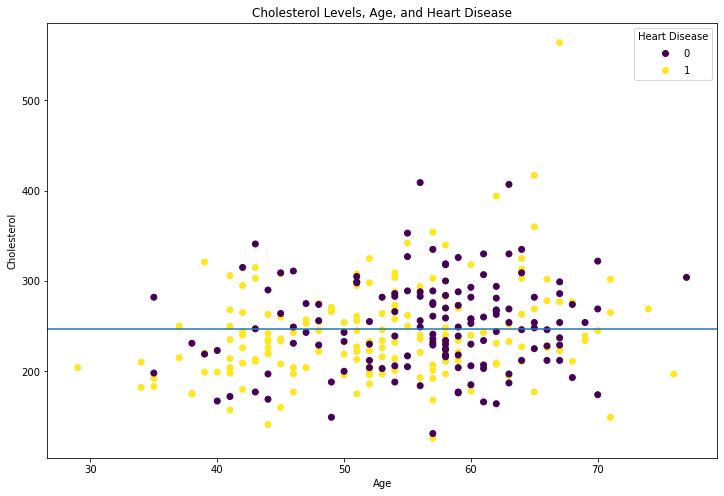

In [4]:
# Scatter plot for age and cholesterol
fig, ax = plt.subplots(figsize = (12,8))
heart_disease = df[df["output"]==1]
scatter_plot = ax.scatter(x=df["age"],
                          y=df["chol"],
                          c=df["output"])

ax.axhline(df["chol"].mean(), linestyle='-')
ax.legend(*scatter_plot.legend_elements(), title = "Heart Disease")
ax.set(title = "Cholesterol Levels, Age, and Heart Disease",
       xlabel = "Age",
       ylabel = "Cholesterol")

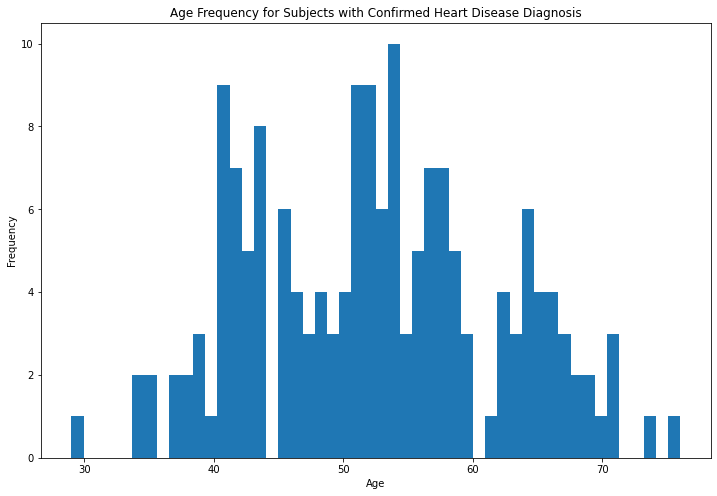

In [5]:
# Histogram for the age of subjects
fig2, ax2 = plt.subplots(figsize = (12,8))
ax2.set(title = "Age Frequency for Subjects with Confirmed Heart Disease Diagnosis",
       xlabel = "Age",
       ylabel = "Frequency")
hist_plot = ax2.hist(x = heart_disease["age"],bins = 50)

[Text(0.5, 1.0, 'Sex Distribution of Heart Disease Dataset'),
 Text(0.5, 0, 'Patient Criteria'),
 Text(0, 0.5, 'Number of Patients')]

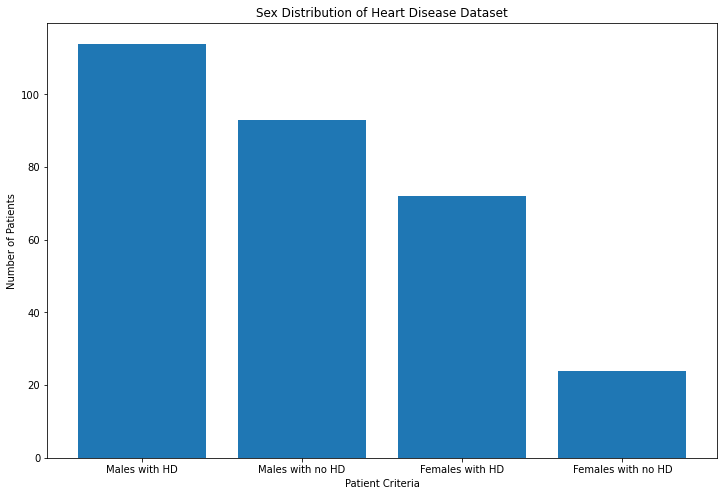

In [6]:
# Bar graph for the gender distribution of the dataset
males = df[df["sex"] == 1]
females = df[df["sex"] == 0]

x_axis = {"Males with HD": len(males[males["output"] == 0]),
         "Males with no HD" : len(males[males["output"] == 1]),
         "Females with HD" : len(females[females["output"] == 1]),
         "Females with no HD" : len(females[females["output"] == 0])}

fig3, ax3 = plt.subplots(figsize = (12,8))
ax3.bar(x_axis.keys(), x_axis.values())
ax3.set(title = "Sex Distribution of Heart Disease Dataset",
       xlabel = "Patient Criteria",
       ylabel = "Number of Patients")


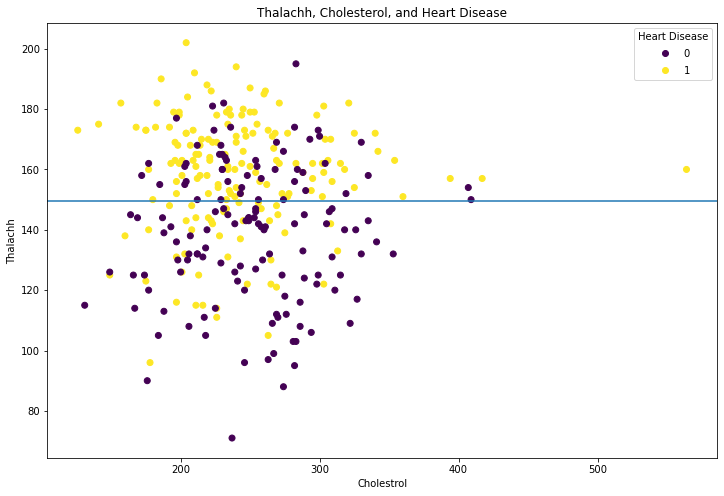

In [7]:
# Scatter plot for cholesterol and thalachh
fig4, ax4 = plt.subplots(figsize = (12,8))
scatter_plot2 = ax4.scatter(x=df["chol"],
                          y=df["thalachh"],
                          c=df["output"])

ax4.axhline(df["thalachh"].mean(), linestyle='-')
ax4.legend(*scatter_plot.legend_elements(), title = "Heart Disease")

ax4.set(title = "Thalachh, Cholesterol, and Heart Disease",
       xlabel = "Cholestrol",
       ylabel = "Thalachh")

plt.show()


## Prediction Tool
Parameters necessary for prediction: age, resting blood pressure, cholesterol, max heart rate, oldpeak, sex, type of chest pain, presence of angina, number of major vessels, slope, and thall.
Enter test data here:

In [8]:
# Converts user inputs to variables
age = input("Age:")
print()

trtbps = input("Resting Blood Pressure:")
print()

chol = input("Cholesterol:")
print()

thalachh = input("Maximum Heart Rate:")
print()

oldpeak = input("Oldpeak:")
print()

sex = int(input("Gender (m = 1, f = 0):"))
print("\n Types of Chest Pain:\n")

print("1: typical angina \n2: atypical angina \n3: non-anginal pain \n4: asymptomatic\n")
cp = input("Chest Pain Number:")

fbs = input("Fasting blood sugar > 120, yes = 1, no = 0 ")

print("\nType of ECG Results\n")
print("0: normal\n1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)\n2: showing probable or definite left ventricular hypertrophy by Estes' criteria")
restecg = int(input("Resting Electrocardiographic Number:"))
print()

exng = input("Exercise Induced Angina? yes = 1, no = 0:")

slp = input("Slope (0-2):")
print()

caa = input("Number of Major Vessels (0-3):")
print()

thall = input("Thall (0-3):")
print()


# Standardizes the first five features within a range of (-3 to 3)
sc = StandardScaler()
X_train[:,0:5] = sc.fit_transform(X_train[:, 0:5])
X_test[:,0:5] = sc.transform(X_test[:, 0:5])

# Model training
model.fit(X_train, y_train)

# Transforms user inputs into correct format for model
test_input1 = sc.transform([[int(age), int(trtbps), int(chol), int(thalachh), float(oldpeak)]])
test_input2 = [int(sex), int(cp), int(fbs), int(restecg), int(exng), int(slp), int(caa), int(thall)]
final_input = np.append(test_input1, test_input2[:])

# Tests the model on the user input 
result = model.predict([final_input])
prob_result = model.predict_proba([final_input])

# Prediction is printed out with an accuracy score
if result == 1:
    print("Prediction: Heart disease is present (accuracy rating: {0:.2f}%)".format(prob_result[0][1]*100))
elif result == 0:
    print("Prediction: No heart disease present (accuracy rating: {0:.2f}%)".format(prob_result[0][0]*100))

Age:64

Resting Blood Pressure:46

Cholesterol:46

Maximum Heart Rate:46

Oldpeak:46

Gender (m = 1, f = 0):46

 Types of Chest Pain:

1: typical angina 
2: atypical angina 
3: non-anginal pain 
4: asymptomatic

Chest Pain Number:64
Fasting blood sugar > 120, yes = 1, no = 0 64

Type of ECG Results

0: normal
1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
2: showing probable or definite left ventricular hypertrophy by Estes' criteria
Resting Electrocardiographic Number:46

Exercise Induced Angina? yes = 1, no = 0:46
Slope (0-2):464

Number of Major Vessels (0-3):46

Thall (0-3):4

Prediction: No heart disease present (accuracy rating: 100.00%)
